In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

/Users/biceneutron/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 730s 4us/step


In [4]:
print('train data:', 'images:', x_img_train.shape, ' labels:', y_label_train.shape)
print('test data:', 'images:', x_img_test.shape, ' labels:', y_label_test.shape)


train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
x_img_train_norm = x_img_train.astype('float32') / 255.0
x_img_test_norm = x_img_test.astype('float32') / 255.0

In [6]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [14]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Flatten())
model.add(Dropout(0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [19]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])


# Start training!
train_history = model.fit(x=x_img_train_norm,
                         y=y_label_train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=128,
                         verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 140s - loss: 1.5161 - acc: 0.4527 - val_loss: 1.2949 - val_acc: 0.5813
Epoch 2/10
 - 134s - loss: 1.1471 - acc: 0.5902 - val_loss: 1.1363 - val_acc: 0.6381
Epoch 3/10
 - 137s - loss: 1.0121 - acc: 0.6430 - val_loss: 1.0697 - val_acc: 0.6438
Epoch 4/10
 - 134s - loss: 0.9134 - acc: 0.6789 - val_loss: 0.9628 - val_acc: 0.6886
Epoch 5/10
 - 135s - loss: 0.8266 - acc: 0.7058 - val_loss: 0.8906 - val_acc: 0.7072
Epoch 6/10
 - 144s - loss: 0.7432 - acc: 0.7370 - val_loss: 0.8356 - val_acc: 0.7171
Epoch 7/10
 - 153s - loss: 0.6748 - acc: 0.7620 - val_loss: 0.8339 - val_acc: 0.7214
Epoch 8/10
 - 145s - loss: 0.6042 - acc: 0.7872 - val_loss: 0.8053 - val_acc: 0.7311
Epoch 9/10
 - 146s - loss: 0.5346 - acc: 0.8111 - val_loss: 0.8068 - val_acc: 0.7274
Epoch 10/10
 - 152s - loss: 0.4775 - acc: 0.8307 - val_loss: 0.7601 - val_acc: 0.7417


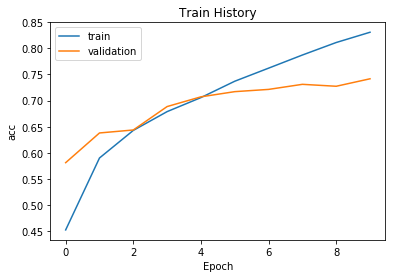

In [31]:
show_train_history(train_history, 'acc', 'val_acc')

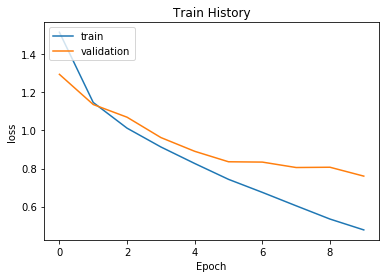

In [32]:
show_train_history(train_history, 'loss', 'val_loss')

In [35]:
# Use test dats to score the model
scores = model.evaluate(x_img_test_norm, y_label_test_OneHot, verbose=0)
print()
print('accuracy=', scores[1])


accuracy= 0.7376


In [36]:
# Start predicting!
prediction=model.predict_classes(x_img_test_norm)

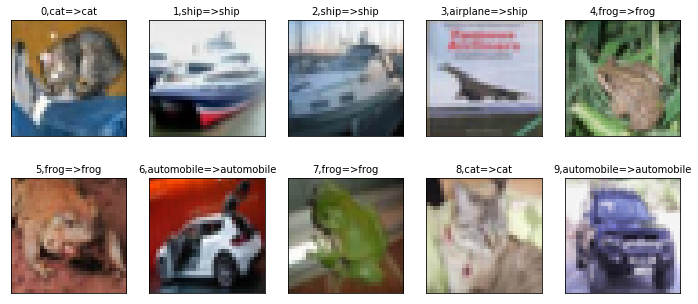

In [40]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [41]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [42]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [43]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])


# Start training!
train_history = model.fit(x=x_img_train_norm,
                         y=y_label_train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=128,
                         verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 481s - loss: 1.8274 - acc: 0.3175 - val_loss: 1.7373 - val_acc: 0.3774
Epoch 2/10


KeyboardInterrupt: 

In [ ]:
show_train_history(train_history, 'acc', 'val_acc')

In [ ]:
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
# Use test dats to score the model
scores = model.evaluate(x_img_test_norm, y_label_test_OneHot, verbose=0)
print()
print('accuracy=', scores[1])

In [39]:
import matplotlib.pyplot as plt

label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap="binary")
        title = str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction)>0:
            title+= '=>' + label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
        
        
    plt.show()

In [30]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.show()